# dummy variables and one hot encoding
``Problem`` </br>
Build a predictor function to predict the price of a home; </br>
1). with `3400 sqr ft` area in west windsor </br>
2). ``2800 sqr ft`` home in robbinsville

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("csv/homeprices_towns.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,556000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2800,585000
6,west windsor,3300,615000
7,west windsor,2800,650000
8,west windsor,3300,710000
9,robbinsville,2600,575000


In [4]:
# we will be hadling categorical data and the towns have nominal variables
# ie the variables dont have numeric ordering or r/ship btn each other eg green, yellow, blue
# ordinal daa may have a r/ship eg low, medium, high or graduate, masters, phd

In [5]:
# to solve the above problem, we will use one hot encoding ie create a column for each of the norminal data categories
# and assign a value ie 1 or 0
# by creating extra columns, we will be creating dummy variables

In [6]:
# lets create the dummy variables
dummies = pd.get_dummies(df.town, dtype="int")
dummies

,monroe township,robbinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [7]:
# dummies["monroe township","robbinsville","west windsor"] = dummies["monroe township","robbinsville","west windsor"].apply(w2n.word_to_num)
# dummies

In [8]:
# concatenate the dataframes
merged = pd.concat([df,dummies], axis="columns")
merged

,town,area,price,monroe township,robbinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,556000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2800,585000,0,0,1
6,west windsor,3300,615000,0,0,1
7,west windsor,2800,650000,0,0,1
8,west windsor,3300,710000,0,0,1
9,robbinsville,2600,575000,0,1,0


In [9]:
# now drop the town column and one of the dummy variable to avoid dummy variable trap
# when one var can be derived from the rest of the variables,they are said to be muliticollinear
# multicollinearity creates a dummy variable trap that can mess up the ML model.
# you have to drop any one variable
# But it has no effect when yo using linear regresion, l. regression drops it by default. its good practice that u drop it
final = merged.drop(["town","west windsor"], axis="columns")
final

,area,price,monroe township,robbinsville
0,2600,550000,1,0
1,3000,556000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2800,585000,0,0
6,3300,615000,0,0
7,2800,650000,0,0
8,3300,710000,0,0
9,2600,575000,0,1


In [10]:
# lets define our independet(x) variable
x = final.drop("price", axis="columns")
x

,area,monroe township,robbinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2800,0,0
6,3300,0,0
7,2800,0,0
8,3300,0,0
9,2600,0,1


In [11]:
# dependent variable(y) ie the price
y = final.price
y

0     550000
1     556000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [12]:
# now lets train our model
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [13]:
# predict the price of 2800 sqr ft in robbinsville
# parameter order: area,0,1 according to the dataframe
model.predict([[2800,0,1]])

/home/lovis/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590657.08418892])

In [14]:
# 3400 sqr ft area in west windsor
model.predict([[3400,0,0]])

/home/lovis/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([684580.08213552])

In [15]:
# lets see hoe the model is performing
model.score(x,y)

0.7880774715600949

This means that our model is 78.8% accurate

## Using sklearn one hot encoding
we wanna archieve the same thing

In [143]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,556000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2800,585000
6,west windsor,3300,615000
7,west windsor,2800,650000
8,west windsor,3300,710000
9,robbinsville,2600,575000


In [144]:
# lets look at datatypes
df.dtypes

town     object
area      int64
price     int64
dtype: object

In [145]:
# lets see the unique values
# that means that we will have more 3 columns
df["town"].unique()

array(['monroe township', 'west windsor', 'robbinsville'], dtype=object)

In [146]:
# import oneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [147]:
# lets create an object of OneHotEncoder
ohe = OneHotEncoder()
ohe

OneHotEncoder()

In [148]:
# lets apply fit_transform our towns and convert it to array
feature_array = ohe.fit_transform(df[["town"]]).toarray()
feature_array

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [149]:
# lets look at categories
# we have one array containing 'monroe township', 'robbinsville', 'west windsor'
ohe.categories_

[array(['monroe township', 'robbinsville', 'west windsor'], dtype=object)]

In [150]:
# lets save this as our labels
feature_labels = ohe.categories_
feature_labels

[array(['monroe township', 'robbinsville', 'west windsor'], dtype=object)]

In [151]:
# lets make a df of feature arrays
finall = pd.DataFrame(feature_array, columns=feature_labels)
finall

,monroe township,robbinsville,west windsor
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [195]:
merged = pd.concat([df,finall], axis="columns")
merged

,town,area,price,"(monroe township,)","(robbinsville,)","(west windsor,)"
0,monroe township,2600,550000,1.0,0.0,0.0
1,monroe township,3000,556000,1.0,0.0,0.0
2,monroe township,3200,610000,1.0,0.0,0.0
3,monroe township,3600,680000,1.0,0.0,0.0
4,monroe township,4000,725000,1.0,0.0,0.0
5,west windsor,2800,585000,0.0,0.0,1.0
6,west windsor,3300,615000,0.0,0.0,1.0
7,west windsor,2800,650000,0.0,0.0,1.0
8,west windsor,3300,710000,0.0,0.0,1.0
9,robbinsville,2600,575000,0.0,1.0,0.0


In [196]:
# drop town and any one other column
df_new = merged.drop(["town"], axis="columns")
df_new

,area,price,"(monroe township,)","(robbinsville,)","(west windsor,)"
0,2600,550000,1.0,0.0,0.0
1,3000,556000,1.0,0.0,0.0
2,3200,610000,1.0,0.0,0.0
3,3600,680000,1.0,0.0,0.0
4,4000,725000,1.0,0.0,0.0
5,2800,585000,0.0,0.0,1.0
6,3300,615000,0.0,0.0,1.0
7,2800,650000,0.0,0.0,1.0
8,3300,710000,0.0,0.0,1.0
9,2600,575000,0.0,1.0,0.0


In [203]:
# now lets define our labels
# .values will turn the df to array
X = df_new.drop("price", axis="columns").values
X

array([[2.6e+03, 1.0e+00, 0.0e+00, 0.0e+00],
       [3.0e+03, 1.0e+00, 0.0e+00, 0.0e+00],
       [3.2e+03, 1.0e+00, 0.0e+00, 0.0e+00],
       [3.6e+03, 1.0e+00, 0.0e+00, 0.0e+00],
       [4.0e+03, 1.0e+00, 0.0e+00, 0.0e+00],
       [2.8e+03, 0.0e+00, 0.0e+00, 1.0e+00],
       [3.3e+03, 0.0e+00, 0.0e+00, 1.0e+00],
       [2.8e+03, 0.0e+00, 0.0e+00, 1.0e+00],
       [3.3e+03, 0.0e+00, 0.0e+00, 1.0e+00],
       [2.6e+03, 0.0e+00, 1.0e+00, 0.0e+00],
       [2.9e+03, 0.0e+00, 1.0e+00, 0.0e+00],
       [3.1e+03, 0.0e+00, 1.0e+00, 0.0e+00],
       [3.6e+03, 0.0e+00, 1.0e+00, 0.0e+00]])

In [204]:
Y= df_new["price"]
Y

0     550000
1     556000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [224]:
# lets train the model now
model.fit(X,y)

LinearRegression()

In [225]:
#  2800 sqr ft home in robbinsville
model.predict([[2800,0,1,0]])

array([590657.08418891])

In [226]:
#  3400 sqr ft area in west windsor
model.predict([[2800,0,0,1]])

array([608157.08418891])

In [227]:
model.score(X,Y)

0.7880774715600949

# Exercise
OneHotEncoder

In [228]:
# import csv
cars = pd.read_csv("csv/carprices.csv")
cars

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [232]:
# get dummies on car model
dummy = pd.get_dummies(cars["Car Model"], dtype="int")
dummy

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [235]:
# concatenate dataframes
# axis =1 is the same as axis="columns"
merged = pd.concat([cars, dummy], axis=1)
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [237]:
# now lets drop car model and one more dummy column
cars_final = merged.drop(["Car Model","Mercedez Benz C class"], axis="columns")
cars_final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [239]:
# lets get the feature labels for training
x_label = cars_final.drop(["Sell Price($)"], axis=1)
x_label

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [240]:
y_label = cars_final["Sell Price($)"]
y_label

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [249]:
# now lets first plot a scatter to see if linear regression is fit for this dataset
import matplotlib.pyplot as plt

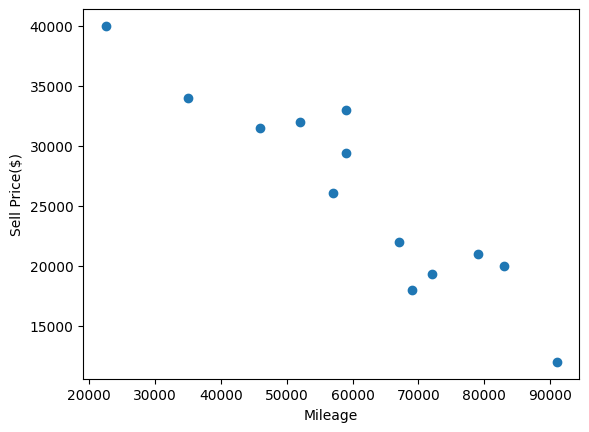

In [250]:
plt.xlabel("Mileage")
plt.ylabel("Sell Price($)")
plt.scatter(cars["Mileage"], cars["Sell Price($)"])
plt.show()

In [251]:
# Linear regression is suitable
# lets create an object of LinearRegression class
cars_model = LinearRegression()
cars_model

LinearRegression()

In [252]:
# lets now train our model
cars_model.fit(x_label, y_label)

LinearRegression()

In [254]:
# lets see the accuracy of the model
cars_model.score(x_label, y_label)

0.9417050937281082

The model is 94% accurate

In [261]:
# now lets do predictions
# predict price of a mercedes benz that is 4yr old with mileage 45000
cars_model.predict([[4500,4,0,0]])

/home/lovis/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51981.26203334])

In [262]:
# predict price of a BMW X5 that is 7yr old with mileage 86000
cars_model.predict([[8600,7,0,1]])

/home/lovis/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39728.19323785])